In [9]:
import numpy as np
from scipy.constants import physical_constants as pc
import matplotlib.pyplot as plt


a) Démontrez, par induction ou autrement, que les vecteurs $q_i$ sont orthonormaux.

Ces vecteurs sont construits comme:
$$u_0 = a_0 
\\ u_1 = a_1 - (q_0\cdot a_1)q_0  
\\ u_2 = a_2  - (q_0\cdot a_2)q_0  - (q_1\cdot a_2)q_1  
 \\q_0 = \frac{u_0}{|u_0|}
 \\q_1=\frac{u_1}{|u_1|}
 \\q_2=\frac{u_2}{|u_2|}$$
 
 on remarque rapidement que les vecteurs $u_i$ sont orthogonaux par contruction. En effet, $u_1$ est simplement la soustraction entre $a_1$ et sa projection sur la direction de $a_0$. La résultante est alors nécessairement orthogonale à $a_0$ et donc $u_0$. Il est est de même pour $u_2$ qu'on force à être orthogonal à $u_1$ et $u_0$ de la même façon.
 
 Nous savons donc que les vecteurs $u_i$ sont nécessairement orthogonaux. Comme les $q_i$ sont simplement les vecteurs $u_i$ avec une norme de 1, les vecteurs $q_i$ sont alors nécessairement orthonormés par construction.

b) En suivant les instructions de l'énoncé du devoir, il est possible de reconstruire les matrices Q et R pour toute matrice d'entrée. En effet, comme Q et R sont simplement composés de $a_i$, $u_i$ et $q_i$, nous utilisons simplement les relations du numéro précédent pour les calculer. Le code suivant commence calculer tous ces vecteurs, puis les insère dans les matrices Q et R de façon appropriée. 

On entre alors la matrice suivante dans l'algorithme
$$ A = \begin{pmatrix}
1&4&8&4\\ 
4&2&3&7\\ 
8&3&6&9\\ 
4&7&9& 2
\end{pmatrix}$$

On obtient alors:
$$Q = \begin{pmatrix}
0.102&0.558&0.81&0.148\\ 
0.406&-0.107&-0.141&0.896\\ 
0.812&-0.381&0.23&-0.377\\ 
0.406&0.729&-0.521&-0.179
\end{pmatrix}$$
et
$$ R =\begin{pmatrix}
9.849&6.498&10.56&11.372\\ 
0.0&5.981&8.423&-0.484\\ 
0.0&0.0&2.746&3.277\\ 
0.0&0.0&0.0&3.116
\end{pmatrix}$$
On vérifie par la suite que l'algorithme ait bien produit les bons Q et R. En effet :
$$ Q\cdot R = \begin{pmatrix}
1.0&4.0&8.0&4.0\\ 
4.0&2.0&3.0&7.0\\ 
8.0&3.0&6.0&9.0\\ 
4.0&7.0&9.0&2.0
\end{pmatrix}$$

In [29]:
def latex_matrix(mat):
    print("\\begin{pmatrix}")
    for i in range(len(mat)):
        for j in range(len(mat)):
            if j != len(mat) - 1:
                print(np.round(mat[i,j],3), end = "&")
            elif i != len(mat) -1:
                print(np.round(mat[i,j],3), end = "\\\\ \n")
            else:
                print(np.round(mat[i,j],3))
    print("\\end{pmatrix}")
    
def mat_a_QR(A):

    A = A.T
    Q_trans = np.copy(A) *0
    R_trans = np.copy(A) *0
    
    u_liste = []
    q_liste = []
    a_liste = []
    
    for i in range(len(A)):
        ai = np.array(A[i][:])
        ui = ai
        for j in range(i):
            ui = np.subtract(ui, np.dot(q_liste[j], ai)*q_liste[j])
        q_liste.append(ui/np.linalg.norm(ui))
        u_liste.append(ui)
        a_liste.append(ai)
    
    for i in range(len(A)):
        R_trans[i][i] = np.linalg.norm(u_liste[i])
        for j in range(i+1,len(A)):
            R_trans[i][j] = np.dot(q_liste[i],a_liste[j])

    return np.array(q_liste).T, R_trans

               
A = np.array([[1.0,4.0,8.0,4.0], [4.0,2.0,3.0,7.0],[8.0,3.0,6.0,9.0],[4.0,7.0,9.0,2.0]])
Q,R = mat_a_QR(A)
print("A = \n{},\n Q = \n{},\n R = \n{},\n QR = \n{}".format(A,Q,R,np.dot(Q,R)))


A = 
[[ 1.  4.  8.  4.]
 [ 4.  2.  3.  7.]
 [ 8.  3.  6.  9.]
 [ 4.  7.  9.  2.]],
 Q = 
[[ 0.10153462  0.558463    0.80981107  0.1483773 ]
 [ 0.40613847 -0.10686638 -0.14147555  0.8964462 ]
 [ 0.81227693 -0.38092692  0.22995024 -0.37712564]
 [ 0.40613847  0.72910447 -0.5208777  -0.17928924]],
 R = 
[[  9.8488578    6.49821546  10.55960012  11.37187705]
 [  0.           5.98106979   8.4234836   -0.484346  ]
 [  0.           0.           2.74586406   3.27671222]
 [  0.           0.           0.           3.11592335]],
 QR = 
[[ 1.  4.  8.  4.]
 [ 4.  2.  3.  7.]
 [ 8.  3.  6.  9.]
 [ 4.  7.  9.  2.]]


c) Écrire un programme permattant de calculer les vecteurs propres et valeurs propres d'une matrice carrée réelle.

Les étapes à suivre pour obtenir les valeurs et vecteurs propres à partir des matrices Q et R sont, selon la page 244 du Newmann,:
\begin{enumerate}
\item Créer V, une matrice NxN, qui contiendra les vecteurs propres et l'initialiser comme étant la matrice identité. On sélectionne aussi un seuil $\epsilon$ pour plus tard.
\item On calcule la décomposition QR de la matrice A
\item On actualise A à $A = RQ$
\item On multiplie Q à V par la droite
\item On vérifie si les valeurs hors diagonales sont inférieurs à la valeur seuil
\end{enumerate}
À la fin de l'algorithme, nous avons effectivement diagonalisé A. Ses valeurs propres sont ainsi les valeurs sur la diagonale. Le ma matrice V contient aussi les vecteurs propres dans ses colonnes. Nous avons donc effectivement extrait les valeurs et vecteurs propres de la matrice A.

Après avoir exécuté l'algorithme ci-bas, nous obtenons des valeurs propres de:

$21.0,\ -8.0,\ -3.0,\ \ 1.0$

En utilisant comme entrée la matrice A du numéro précédent. Nous utilisons aussi un $\epsilon$ de $10^{-9}$. La matrice V contenant les vecteur propres est alors:

$$\begin{pmatrix}
 0.43151697 & 0.38357064 & 0.77459667 &-0.25819889  \\
  0.38357064 &-0.43151697 & 0.25819889 & 0.77459667\\
  0.62330229 &-0.52740963 &-0.25819889 &-0.51639778\\
  0.52740963 & 0.62330229 &-0.51639778 & 0.25819889
\end{pmatrix} $$

In [32]:
A = np.array([[1.0,4.0,8.0,4.0], [4.0,2.0,3.0,7.0],[8.0,3.0,6.0,9.0],[4.0,7.0,9.0,2.0]])

def extract_eigenvalues(A, epsilon = 1e-9):
    V = np.identity(len(A))
    condition = True
    while condition:
        condition = False
        Q,R = mat_a_QR(A)
        A = np.dot(R,Q)
        for x in range(len(A)):
            for y in range(len(A)):
                if x!=y:
                    if A[x,y] > epsilon:
                        condition = True
        V = np.dot(V,Q)
    eigenvalues = []
    for x in range(len(A)):
        eigenvalues.append(A[x,x])
    return np.array(eigenvalues), V

values, vectors = extract_eigenvalues(A)
print(values,"\n",  vectors)

[ 21.  -8.  -3.   1.] 
 [[ 0.43151697  0.38357064  0.77459667 -0.25819889]
 [ 0.38357064 -0.43151697  0.25819889  0.77459667]
 [ 0.62330229 -0.52740963 -0.25819889 -0.51639778]
 [ 0.52740963  0.62330229 -0.51639778  0.25819889]]


## Puits quantique asymétrique

### d)

Dans un état d'énergie $E$, La partie spatiale de la fonction d'onde obéit à l'équation de schr\"odinger indépendante du temps $\hat{H}\psi(x) =
E\psi(x)$, où l'opérateur hamiltonien $\hat{H}$ est donné par 
\begin{align}
\hat{H} = - {\hbar^2\over2M}\,{d^2\over dx^2} + V(x).
\end{align}

En considérant que le puits de potentiel est infini à $x=0$ et $x=L$, on obtient la fonction d'onde suivante 
\begin{align}
\psi(x) = \sum_{n=1}^\infty \psi_n \sin {\frac{\pi n x}{L}},
\end{align}
où les  $\psi_n$ sont les coefficients de Fourier.

Sachant que pour des entier $m, n$ positifs,
\begin{align}
\int_0^L \sin {\pi m x\over L} \,\sin{\pi n x\over L} dx
  = \begin{cases}
      L/2 & \text{si $m=n$,} \\
      0          & \text{autrement,}
    \end{cases} 
\end{align}

On veut montrer que $\hat{H}\psi = E\psi$ implique

\begin{align}
\sum_{n=1}^\infty \psi_n \int_0^L \sin{\pi m x\over L}
                  \hat{H}\sin{\pi n x\over L} dx
  = \frac{L}{2} E \psi_m.
\end{align}

Procédons.


\begin{align}
\hat{H}\psi(x) = \hat{H}\sum_{n} \psi_n \sin {\frac{\pi n x}{L}} = E\sum_{m} \psi_m \sin {\frac{\pi m x}{L}}
\end{align}

On introduit $\sum_{j}\sin {\frac{\pi j x}{L}}$ de chaque côté, 

\begin{align}
\sum_{n} \sum_{j} \hat{H}\psi_n \sin {\frac{\pi n x}{L}}  \sin {\frac{\pi j x}{L}} = E\sum_{m} \sum_{j}  \psi_m \sin {\frac{\pi m x}{L}} \sin {\frac{\pi j x}{L}}
\end{align}

On intègre ensuite de chaque côté,

\begin{align}
\sum_{n} \sum_{j} \psi_n \int_0^L\sin {\frac{\pi n x}{L}} \hat{H} \sin {\frac{\pi j x}{L}} dx = E\sum_{m} \sum_{j}  \psi_m \int_0^L \sin {\frac{\pi m x}{L}} \sin {\frac{\pi j x}{L}} dx
\end{align}

avec la condition d'orthogonalité et en choisissant $j = m$, 

\begin{align}
\sum_{m} \sum_{n}  \psi_n \int_0^L\sin {\frac{\pi n x}{L}} \hat{H} \sin {\frac{\pi m x}{L}} dx &= \frac{L}{2}E\sum_{m} \psi_m \\
\Rightarrow \sum_{n}  \psi_n \int_0^L\sin {\frac{\pi n x}{L}} \hat{H} \sin {\frac{\pi m x}{L}} dx &= \frac{L}{2}E \psi_m \ \ \ \ \text{C.Q.F.D}
\end{align}


On peut ainsi définir les éléments $H_{mn}$ d'une matrice $\mathbf{H}$ comme
\begin{align}
H_{mn} &= {2\over L} \int_0^L \sin{\pi m x\over L}
          \hat{H}\sin{\pi n x\over L}  dx \nonumber\\
       &= {2\over L} \int_0^L \sin{\pi m x\over L}
          \left[ - {\hbar^2\over2M}\,{d^2\over dx^2} + V(x) \right]
          \sin{\pi n x\over L} dx,
\end{align}

Pour ensuite voir que

\begin{align}
\sum_{n} H_{mn} \psi_n = E \psi_m
\end{align}



### e) 

Avec un potentiel de la forme $V(x) = ax/L$, l'expression de $H_mn$ devient

\begin{align}
H_{mn} &= \frac{2}{L} \int_0^L \sin \left(\frac{m\pi x}{L}\right)\left[\frac{-\hbar^2}{2m} \frac{d^2}{dx^2} + \frac{ax}{L}\right] \sin \left(\frac{n\pi x}{L}\right) dx \\
&= \frac{2}{L} \left\{\underbrace{\int_0^L \sin \left(\frac{m\pi x}{L}\right)\left[\frac{-\hbar^2}{2m} \frac{d^2}{dx^2} \sin \left(\frac{n\pi x}{L}\right)\right]dx}_{(1)} + \underbrace{\int_0^L \sin \left(\frac{m\pi x}{L}\right)\frac{ax}{L} \sin \left(\frac{n\pi x}{L}\right)dx}_{(2)} \right\}\\[0.5cm]
(1) &= \left( \frac{n\pi}{L}\right)^2\frac{\hbar^2}{2m} \int_0^L \sin \left(\frac{m\pi x}{L}\right)\sin \left(\frac{n\pi x}{L}\right)dx\\[0.2cm]
&= 
\begin{cases}
      0 & \text{si}\ m\neq n \\
      \frac{1}{4mL}\left(n\pi\hbar\right)^2 & \text{si}\ m=n
\end{cases}
\\[0.5cm]
(2) &= \frac{a}{L}\int_0^L x\sin \left(\frac{m\pi x}{L}\right) \sin \left(\frac{n\pi x}{L}\right)dx \\[0.2cm]
&= 
\begin{cases}
      0 & \text{si $m\neq n$ et $m, n$ sont pairs} \\
      -\frac{a}{L}\left(\frac{2L}{\pi}\right)^2\frac{mn}{m^2-n^2} & \text{si $m\neq n$ et l'un et l'autre est impair} \\
      \frac{aL}{4}& \text{si $m=n$}
\end{cases}
\end{align}


In [19]:
def get_H_mn(m, n, a=10, L=5e-10):
    hbar = pc['Planck constant over 2 pi'][0] # J*s
    m_e = pc['electron mass'][0]              # Kg
    a = 10 * 1.6022e-19 # Conversion eV --> Joules
    
    # Résultat du terme de potentiel
    if m != n:

        # Si les deux sont simultanément pairs ou impairs
        if ((m%2 == 0) and (n%2 == 0)) or ((m%2 != 0) and (n%2 != 0)):

            H_mn = 0

        # Si l'un est pair et l'autre est impair, et inversement
        elif ((m%2 == 0) and (n%2 != 0)) or ((m%2 != 0) and (n%2 == 0)):
            H_mn = -(a*4*L/np.pi**2)*(m*n/(m**2 - n**2)**2)
    
    # Si m = n
    else: 
        # Résultat du terme de qte de mvt
        tmp = (n*np.pi*hbar)**2/(4*m_e*L)
        H_mn = a*L/4 + tmp
            
    return 2*(H_mn)/L

H_mn = get_H_mn(2, 1)
print(H_mn)                

-2.885987563231175e-19


### f) 

In [35]:
def get_H(m, n):
    
    H = np.zeros((m, n))
    
    for i in range(m):
        for j in range(n):
            
            H[i, j] = get_H_mn(i+1, j+1)
            
    return H

H = get_H(10, 10)

#H_dag = H.conj().T

# Vérification Hermitienne
#print(H_dag == H)

# Méthode Numpy
eigval, eigvec = np.linalg.eigh(H)

# Décomposition QR
values, vectors = extract_eigenvalues(H, 1e-3)

eigval = eigval/1.6022e-19 
values = values/1.6022e-19
print(eigval)
print(values)

[   5.83634647   11.18100624   18.66269569   29.14384749   42.65452654
   59.1844677    78.72828442  101.28407855  126.84960704  155.55313468]
[   7.77088606   10.78933013   18.13502651   28.82256113   42.46871048
   59.06827942   78.65157195  101.22828162  126.80848609  155.33486142]


### g)

In [26]:
H_100 = get_H(100, 100)

eigval_100, eigvec_100 = np.linalg.eigh(H_100)
eigval_100 = eigval_100/1.6022e-19 
print(eigval_100[:10])


[   5.83634607   11.18100492   18.66269382   29.14383869   42.65451742
   59.18441512   78.72823259  101.2834476   126.84877469  155.42351032]


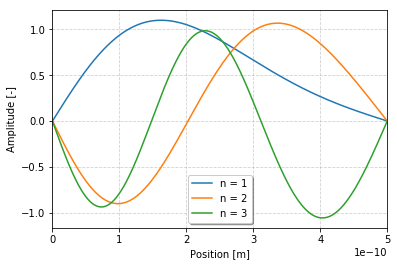

In [43]:
def get_psi_x(mat, n, L=5e-10):
    
    eigvals, eigvecs = np.linalg.eigh(mat)
    
    
    eigvec = eigvecs[:, n-1]
    
    x = np.linspace(0, L, 1000)
    psi_x = np.zeros(len(x))
    
    for i in range(1, len(eigvec)+1):
        psi_n = eigvec[i-1]
        psi_x += psi_n*np.sin((np.pi*i*x)/L)
        
    return psi_x, x      
    
psi_1_x, domain = get_psi_x(H, 1)
psi_2_x, _ = get_psi_x(H, 2)
psi_3_x, _ = get_psi_x(H, 3)


plt.plot(domain, psi_1_x, label='n = 1')
plt.plot(domain, psi_2_x, label='n = 2')
plt.plot(domain, psi_3_x, label='n = 3')

plt.ylabel('Amplitude [-]')
plt.xlabel('Position [m]')
plt.grid(which='Major', ls='--', alpha=0.6)
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 5e-10])
plt.show()